![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [17]:
import pandas as pd
df = pd.read_csv('D:\praktikum_datasets-main\praktikum_datasets-main\housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [19]:
df.drop('location', axis=1, inplace=True)

In [20]:
#df[df['size'] == 'Площадьземли:1сот']
df['size'] = df['size'].replace('Площадьземли:1сот')

In [21]:
df.drop(df[df['price']=='Договорная'].index, inplace=True)

In [93]:
df[['rooms', 'size', 'level','max_levels', 'price']] = df[['rooms', 'size', 'level','max_levels', 'price']].astype(int)

In [23]:
df.shape

(7466, 6)

In [24]:
import numpy as np
import sklearn
import matplotlib as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'level'}>,
        <AxesSubplot:title={'center':'max_levels'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

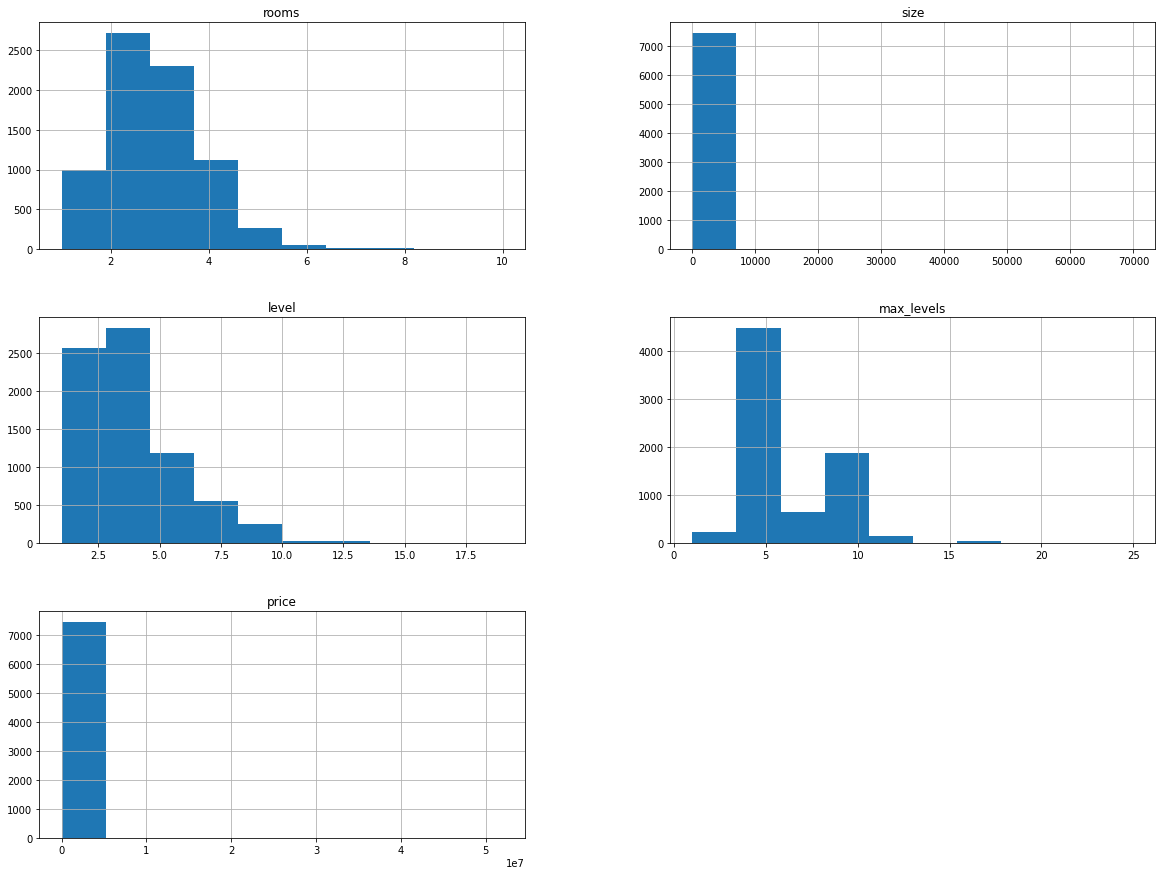

In [25]:
df.hist(figsize=(20,15))

In [97]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [98]:
train_set.head(10)

,district,rooms,size,level,max_levels,price
1060,Чиланзарский,2,49,2,4,33500
543,Юнусабадский,2,58,3,5,38000
4160,Чиланзарский,3,67,2,4,52500
1903,Юнусабадский,2,50,4,4,33500
2061,Чиланзарский,2,40,3,4,38500
1193,Учтепинский,2,48,3,4,34500
1506,Мирзо-Улугбекский,5,125,5,5,107000
7270,Шайхантахурский,3,92,2,9,50000
868,Чиланзарский,2,58,4,5,30000
7559,Шайхантахурский,1,27,2,4,23000


In [99]:
test_set.head(10)

,district,rooms,size,level,max_levels,price
2301,Яшнободский,3,86,4,9,89000
3540,Олмазорский,3,70,3,4,41000
2149,Яккасарайский,3,90,5,5,45000
2921,Мирзо-Улугбекский,3,70,1,4,72500
5642,Янгихаётский,3,70,3,9,61900
1883,Шайхантахурский,3,72,2,9,58999
4205,Олмазорский,2,58,4,5,36000
4073,Юнусабадский,4,78,1,4,52000
7163,Чиланзарский,3,65,9,9,37500
4907,Мирзо-Улугбекский,2,50,1,4,31000


In [29]:
df['rooms'].max()

10.0

<AxesSubplot:>

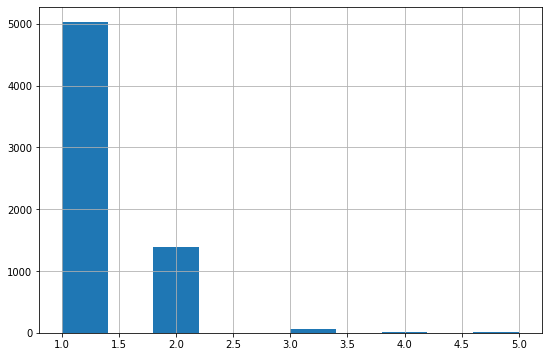

In [30]:
n = pd.cut(df['rooms'], bins=[1, 3, 5, 7, 9, np.inf], labels=[1, 2, 3, 4, 5])
n.hist(figsize=(9,6))

Mozanatni saqlash uchun 

In [95]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [100]:
husing = train_set.copy()

In [101]:
df.corrwith(df['price']).sort_values(ascending=True)

level        -0.003454
size          0.001107
max_levels    0.011168
rooms         0.056176
price         1.000000
dtype: float64

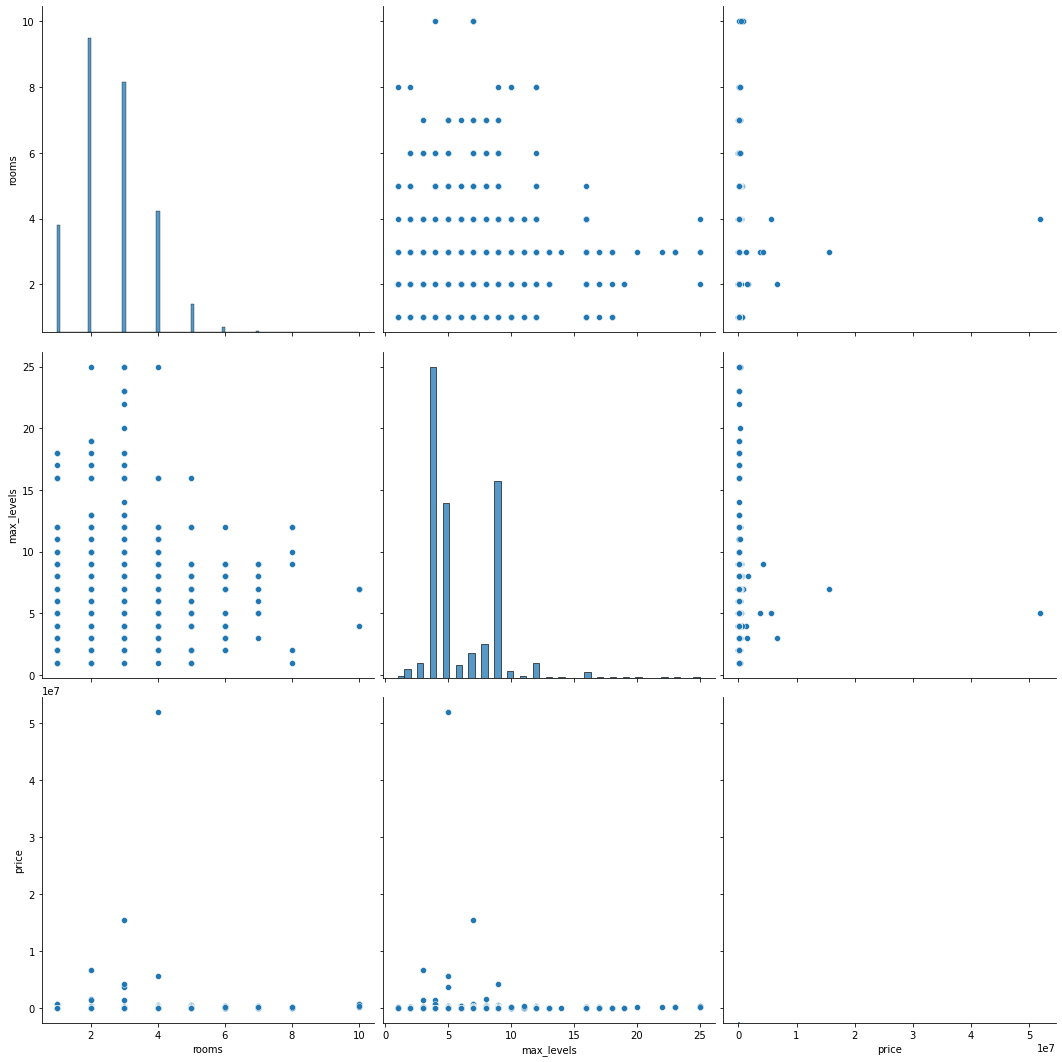

In [102]:
import seaborn as sns
cols = ['rooms', 'max_levels', 'price']
sns.pairplot(df[cols], height=5)


In [147]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3.0,57.0,4.0,4.0,52000.0
1,Яккасарайский,2.0,52.0,4.0,5.0,56000.0
2,Чиланзарский,2.0,42.0,4.0,4.0,37000.0
3,Чиланзарский,3.0,65.0,1.0,4.0,49500.0
4,Чиланзарский,3.0,70.0,3.0,5.0,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1.0,38.0,5.0,5.0,24500.0
7561,Яшнободский,2.0,49.0,1.0,4.0,32000.0
7562,Шайхантахурский,2.0,64.0,3.0,9.0,40000.0
7563,Мирзо-Улугбекский,1.0,18.0,1.0,4.0,11000.0


In [195]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

x_train = train_set.drop("price", axis=1)
y= train_set['price'].copy()

x_num = x_train.drop('district',axis=1)

Simplelmputer

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])


In [197]:
num_pipeline.fit_transform(x_num)

array([[-0.57245014, -0.043671  , -0.76224752, -0.77797137],
       [-0.57245014, -0.03798229, -0.31330458, -0.39435258],
       [ 0.34727547, -0.03229359, -0.76224752, -0.77797137],
       ...,
       [ 2.18672668,  0.08590513, -1.21119047,  0.75650379],
       [-0.57245014, -0.04493516,  0.13563837, -0.39435258],
       [-0.57245014, -0.03671814,  0.13563837, -0.77797137]])

In [165]:
from sklearn.compose import ColumnTransformer

num_attribs = list(x_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs)
])

In [198]:
x_num

,rooms,size,level,max_levels
1060,2,49,2,4
543,2,58,3,5
4160,3,67,2,4
1903,2,50,4,4
2061,2,40,3,4
...,...,...,...,...
5262,3,78,7,9
5297,3,65,3,4
5461,5,254,1,8
870,2,47,4,5


In [199]:
x_train

,district,rooms,size,level,max_levels
1060,Чиланзарский,2,49,2,4
543,Юнусабадский,2,58,3,5
4160,Чиланзарский,3,67,2,4
1903,Юнусабадский,2,50,4,4
2061,Чиланзарский,2,40,3,4
...,...,...,...,...,...
5262,Чиланзарский,3,78,7,9
5297,Чиланзарский,3,65,3,4
5461,Юнусабадский,5,254,1,8
870,Чиланзарский,2,47,4,5


In [200]:
x_prepared = full_pipeline.fit_transform(x_train)
x_prepared

array([[-0.57245014, -0.043671  , -0.76224752, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57245014, -0.03798229, -0.31330458, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34727547, -0.03229359, -0.76224752, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.18672668,  0.08590513, -1.21119047, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57245014, -0.04493516,  0.13563837, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57245014, -0.03671814,  0.13563837, ...,  0.        ,
         0.        ,  0.        ]])

Liner Regression

In [201]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()



In [202]:
LR_model.fit(x_prepared, y)

LinearRegression()

In [203]:
test_data = x_train.sample(5)
test_data

,district,rooms,size,level,max_levels
363,Юнусабадский,2,62,4,9
5899,Чиланзарский,1,32,3,5
43,Яккасарайский,2,48,5,9
4331,Юнусабадский,2,57,3,4
4942,Мирабадский,6,130,7,9


In [204]:
test_label = y.loc[test_data.index]
test_label

363      55000
5899     28500
43       23000
4331     35500
4942    130000
Name: price, dtype: int32

In [205]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-0.57245014, -0.03545398,  0.13563837,  1.14012258,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.49217574, -0.05441634, -0.31330458, -0.39435258,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57245014, -0.04430308,  0.58458131,  1.14012258,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.57245014, -0.03861437, -0.31330458, -0.77797137,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 3.10645228,  0.00752737,  1

In [206]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([ 61187.16270193,  22336.35386038,  60705.8134227 ,  50572.93683761,
       163904.21784344])

In [208]:
pd.DataFrame({'Prognoz':predicted_data, 'Rial baxosi':test_label})

,Prognoz,Rial baxosi
363,61187.162702,55000
5899,22336.353860,28500
43,60705.813423,23000
4331,50572.936838,35500
4942,163904.217843,130000


In [209]:
test_set

,district,rooms,size,level,max_levels,price
2301,Яшнободский,3,86,4,9,89000
3540,Олмазорский,3,70,3,4,41000
2149,Яккасарайский,3,90,5,5,45000
2921,Мирзо-Улугбекский,3,70,1,4,72500
5642,Янгихаётский,3,70,3,9,61900
...,...,...,...,...,...,...
581,Чиланзарский,3,57,1,4,44000
6587,Чиланзарский,2,65,5,12,42500
6621,Мирзо-Улугбекский,2,46,4,4,30500
1585,Юнусабадский,2,52,3,4,60000


In [210]:
x_test = test_set.drop('price', axis=1)

In [211]:
y_test = test_set['price'].copy()

In [212]:
x_test_prepared = full_pipeline.transform(x_test)


In [213]:
y_predicted = LR_model.predict(x_test_prepared)

In [214]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1910642.662062319


In [215]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(x_prepared,y)

DecisionTreeRegressor()

In [216]:
y_predicted = Tree_model.predict(x_test_prepared)

In [217]:
lin_rmse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1910642.662062319


In [218]:
x = df.drop('price', axis=1)
y = df['price'].copy()
x_prepared = full_pipeline.transform(x)

In [219]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [220]:
from sklearn.model_selection import cross_val_score

In [221]:
scores = cross_val_score(LR_model, x_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [222]:
display_scores(LR_rmse_scores)

Scores: [  72555.49665725   46822.05462086  144430.3436205    42477.18443038
   48257.02567082   43502.19925225   52126.16933179 1901389.31247715
  166778.95539119  650091.94600517]
Mean: 316843.06874573615
Std.dev: 556675.8602047951


Decision Tree

In [223]:
scores = cross_val_score(Tree_model, x_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  63209.78947515  289545.69071276  141766.59250537  208242.69604419
   29281.82066009   77379.89314363  568552.2729758  1907779.12795112
  289661.63378956  642721.21262382]
Mean: 421814.0729881489
Std.dev: 532797.9195038099


Random Forest

In [224]:
import pickle

filename = "ML_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(LR_model, file)

In [225]:
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [227]:
scores = cross_val_score(model, x_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  72555.49665725   46822.05462086  144430.3436205    42477.18443038
   48257.02567082   43502.19925225   52126.16933179 1901389.31247715
  166778.95539119  650091.94600517]
Mean: 316843.06874573615
Std.dev: 556675.8602047951


In [228]:
import joblib

filename = 'LR_model,jbl'
joblib.dump(LR_model, filename)

['LR_model,jbl']

In [229]:
model = joblib.load(filename)

In [230]:
scores = cross_val_score(model, x_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  72555.49665725   46822.05462086  144430.3436205    42477.18443038
   48257.02567082   43502.19925225   52126.16933179 1901389.31247715
  166778.95539119  650091.94600517]
Mean: 316843.06874573615
Std.dev: 556675.8602047951


In [231]:
filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename)

['pipeline.jbl']